# Vision models for image interpretation
Some models support image input and can interpret the images. This might be useful to guide the large language model it further decsions about what to do with the image.

In [1]:
from bia_bob import bob
bob.__version__

'0.11.0'

In [2]:
#bob.initialize(model='gemini-pro', vision_model='gemini-pro-vision')
#bob.initialize(model='gpt-4-0125-preview', vision_model='gpt-4-vision-preview')
bob.initialize(endpoint='ollama', model='llama2', vision_model='llava')

In [3]:
from bia_bob._machinery import Context
# Context.verbose = True

First, we load an example image.

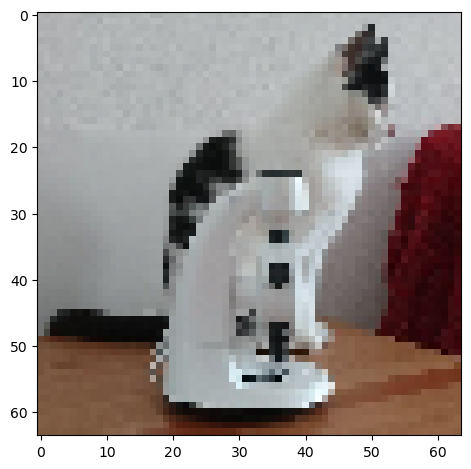

In [4]:
from skimage.io import imread, imshow
#image = imread("c:/structure/code/BioImageAnalysisNotebooks/data/hela-cells-8bit.tif")[::2,::2]
image = imread("real_cat.png")[::8,::8]

imshow(image)

In [5]:
%%bob image
what's in this image? Answer in one short sentence.

llava image
CHAT []
messages [{'role': 'system', 'content': ''}, {'role': 'user', 'content': "image\nwhat's in this image? Answer in one short sentence.\n", 'images': ['iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAi6ElEQVR4nFWbeZBvaVnfP+92zvkt3X377rMyjDJgcGGIbDODoGWMIUYFNKJGNMFSSUQrZdQQk0qqsiKlRZmYREdRquIeA0JcCKgwgGJYhGFmGGAYZu5szNylb3f/fr9zzrs8T/54T/eQW3Xr3r63l3Pe91m+3+/zfcw73vkuzTkTQgOqOO8RKagqMSestRgMzntKKThrMdaCKsYYQtNweHgIKE3TAqCqeO9omoYUMxgQEUQEHzwpRkJoyDnTdR3WWnLOxHEEY2iaBmstpRRUBTAYY2iagDGWOI40bUOMCe88ooIxoKKUUjDO441FDEgueO/BGBDBTN/XO4/1Fg+GtmmJKdZvJoIUIZc8PYhjvVmzu1xSSkYFrLP0fU/TNMQY2dpaAsowxPqgwRNTov4yWGPw3jOOIxZD23aAMJ/NyKWQU6KI0LTtdHj1sKEesrUOgHGsB+e9R7LgvUNKIeWM9wGApm1ALYrS+IDYgrEWFSGJ0DgHzmGsQYtgVZScM6qKcw6RgqjQNi0CxBRZLpdsNmtiTKScKCUTgq8PXgopZVarNcaAMQZjLN57vPdYa0gpk3ONqmGMqAjjmBhjxFoDpt6wqKKqpBSnF/dY57HGICJYawneoQoYQymCD4Enn3yS17/+R/DeYW19+ZwLKkIIATfdeggNGEP9coOgeB9cDQnrKSoYDNbaKVRHgvekFGmalmEY6LqOUgoignMO61wNbR+w1pJiwlmDob64NYYQAipC17ZgDH3fs1gsAAWFEAI1DQOlFKy1bDY9bdv

 Picture of a person 

As the model and the vision-model are not directly connected, only via the chat history, we need to check if the image content was stored in the chat history.

In [6]:
%%bob
What's again shown in the image?

CHAT [{'role': 'user', 'content': "Assume there is an image. The image can be described like this:  Picture of a person . Just confirm this with 'ok'."}, {'role': 'assistant', 'content': '\nOk, I understand. Please provide the image or a link to it, and I will do my best to identify the person in the image.'}, {'role': 'assistant', 'content': ' Picture of a person '}]
messages [{'role': 'system', 'content': '\n    You are a extremely talented bioimage analyst and you use Python to solve your tasks unless stated otherwise.\n    If the request entails writing code, write concise professional bioimage analysis high-quality code.\n    If there are several ways to solve the task, chose the option with the least amount of code.    \n    If there is no specific programming language required, write python code and follow the below instructions.\n    \n    \n    ## Python specific instructions\n    \n    For python, you can only use those libraries: scikit-image,numpy,scipy,pandas,matplotlib,se

You have to use the `cle` module to perform various image processing tasks, such as computing standard deviations, subtraction, thresholding, and more.



In [ ]:
# Compute standard deviation of a pixel's neighborhood
cle.standard_deviation_neighborhood(image, radius=1)

# Subtract Gaussian blur from an image
cle.subtract_gaussian_background(image, sigma=2)

# Threshold an image using Otsu's method
cle.threshold_otsu(image)

# Compute variance of a pixel's sphere neighborhood
cle.variance_sphere(image, radius=1)